In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np

sales_data = pd.read_csv("rollingsales_nyc2019.csv")
sales_data.columns = sales_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(sales_data.shape)

(79621, 22)


C:\Users\kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sales_data.head()

,id,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,...,1.0,0.0,1.0,1883.0,5200,1900,1,A4,6100000,3/12/2018
1,2,Manhattan,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,...,2.0,0.0,2.0,1510.0,4520,1900,1,B9,0,29/11/2018
2,3,Manhattan,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,...,2.0,0.0,2.0,1510.0,4520,1900,1,B9,0,29/11/2018
3,4,Manhattan,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56,NaN,C0,263 EAST 7TH STREET,...,3.0,0.0,3.0,2430.0,3600,1899,1,C0,6300000,30/04/2019
4,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,373,19,NaN,C7,332 EAST 4TH STREET,...,28.0,2.0,30.0,4651.0,17478,1920,2,C7,14000000,9/01/2019


## 2. Data Understanding

In [4]:
sales_data.dtypes

id                                  int64
borough                            object
neighborhood                       object
building_class_category            object
tax_class_at_present               object
block                               int64
lot                                 int64
ease-ment                         float64
building_class_at_present          object
address                            object
apartment_number                   object
zip_code                            int64
residential_units                 float64
commercial_units                  float64
total_units                       float64
land_square_feet                  float64
gross_square_feet                  object
year_built                          int64
tax_class_at_time_of_sale           int64
building_class_at_time_of_sale     object
sale_price                          int64
sale_date                          object
dtype: object

In [5]:
sales_data.count()

id                                79621
borough                           79621
neighborhood                      79621
building_class_category           79621
tax_class_at_present              79621
block                             79621
lot                               79621
ease-ment                             0
building_class_at_present         79621
address                           79621
apartment_number                  17683
zip_code                          79621
residential_units                 44540
commercial_units                  44540
total_units                       44540
land_square_feet                  46389
gross_square_feet                 62113
year_built                        79621
tax_class_at_time_of_sale         79621
building_class_at_time_of_sale    79621
sale_price                        79621
sale_date                         79621
dtype: int64

In [6]:
!pip install pandas_profiling

In [7]:
import pandas_profiling

profile = sales_data.profile_report(title = "NYC Property Sales")
profile.to_file(output_file = "nyc_property_sales_report.html")

## 3. Data Preparation

In [8]:
sales_data = sales_data.drop(["id","ease-ment", "apartment_number", "residential_units", "commercial_units", "total_units", "land_square_feet", "address","sale_date","neighborhood","zip_code","block","lot"], axis=1)
sales_data.count()

borough                           79621
building_class_category           79621
tax_class_at_present              79621
building_class_at_present         79621
gross_square_feet                 62113
year_built                        79621
tax_class_at_time_of_sale         79621
building_class_at_time_of_sale    79621
sale_price                        79621
dtype: int64

In [9]:
sales_data = sales_data[sales_data.sale_price > 100]
sales_data = sales_data[sales_data.year_built > 1000]
sales_data.count()

borough                           51294
building_class_category           51294
tax_class_at_present              51294
building_class_at_present         51294
gross_square_feet                 37470
year_built                        51294
tax_class_at_time_of_sale         51294
building_class_at_time_of_sale    51294
sale_price                        51294
dtype: int64

In [10]:
sales_manhattan = sales_data[sales_data['borough'] == 'Manhattan']
sales_queens = sales_data[sales_data['borough'] == 'Queens']
sales_bronx = sales_data[sales_data['borough'] == 'Bronx']
sales_brooklyn = sales_data[sales_data['borough'] == 'Brooklyn']
sales_staten_island = sales_data[sales_data['borough'] == 'Staten Island']

In [11]:
# Integrate various data sources 
sales_data = sales_manhattan.append([sales_queens,sales_bronx,sales_brooklyn,sales_staten_island])

# Check the number of rows and columns
sales_data.head()

,borough,building_class_category,tax_class_at_present,building_class_at_present,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price
0,Manhattan,01 ONE FAMILY DWELLINGS,1,A4,5200,1900,1,A4,6100000
3,Manhattan,03 THREE FAMILY DWELLINGS,1,C0,3600,1899,1,C0,6300000
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,2,C7,17478,1920,2,C7,14000000
5,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,C2,6294,1900,2,C2,872500
6,Manhattan,07 RENTALS - WALKUP APARTMENTS,2B,C7,14347,1920,2,C7,1550000


In [12]:
def price_category(row):
    if row['sale_price'] <= 250000:
        return "Low"
    if row['sale_price'] > 250000 and row['sale_price'] <= 500000:
        return "Middle-Low"
    if row['sale_price'] > 500000 and row['sale_price'] <= 750000:
        return "Middle-High"
    if row['sale_price'] > 750000:
        return "High"

sales_data['price_category'] = sales_data.apply (lambda row: price_category(row), axis=1)
sales_data.head()

,borough,building_class_category,tax_class_at_present,building_class_at_present,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,price_category
0,Manhattan,01 ONE FAMILY DWELLINGS,1,A4,5200,1900,1,A4,6100000,High
3,Manhattan,03 THREE FAMILY DWELLINGS,1,C0,3600,1899,1,C0,6300000,High
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,2,C7,17478,1920,2,C7,14000000,High
5,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,C2,6294,1900,2,C2,872500,High
6,Manhattan,07 RENTALS - WALKUP APARTMENTS,2B,C7,14347,1920,2,C7,1550000,High


## 4. Data Transformation

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

sales_data['borough'] = le.fit_transform(sales_data['borough'])
sales_data['building_class_category'] = le.fit_transform(sales_data['building_class_category'])
sales_data['tax_class_at_present'] = le.fit_transform(sales_data['tax_class_at_present'])
sales_data['building_class_at_present'] = le.fit_transform(sales_data['building_class_at_present'])
sales_data['building_class_at_time_of_sale'] = le.fit_transform(sales_data['building_class_at_time_of_sale'])
sales_data['price_category'] = le.fit_transform(sales_data['price_category'])

sales_data.head()

,borough,building_class_category,tax_class_at_present,building_class_at_present,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,price_category
0,2,0,0,4,5200,1900,1,4,6100000,0
3,2,2,0,14,3600,1899,1,14,6300000,0
4,2,6,5,21,17478,1920,2,21,14000000,0
5,2,6,6,16,6294,1900,2,16,872500,0
6,2,6,7,21,14347,1920,2,21,1550000,0


In [14]:
sales_data.fillna(0, inplace=True)
sales_data.count()

borough                           51294
building_class_category           51294
tax_class_at_present              51294
building_class_at_present         51294
gross_square_feet                 51294
year_built                        51294
tax_class_at_time_of_sale         51294
building_class_at_time_of_sale    51294
sale_price                        51294
price_category                    51294
dtype: int64

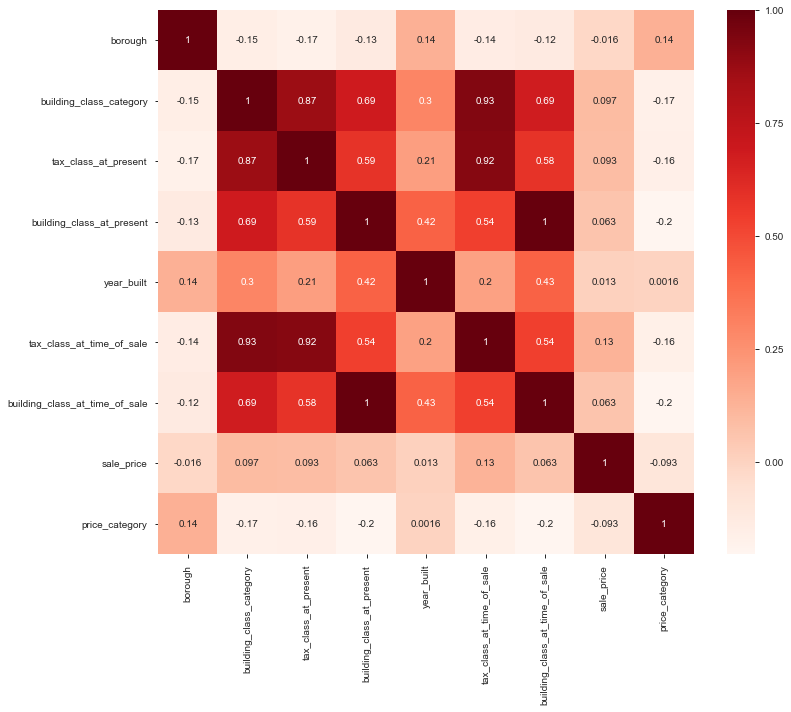

In [15]:
X = sales_data.iloc[:,0:20]  #independent columns
y = sales_data.iloc[:,-2]    #target column i.e price range
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = sales_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#Correlation with output variable
cor_target = abs(cor["sale_price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

building_class_category           0.097428
tax_class_at_present              0.093249
building_class_at_present         0.062776
tax_class_at_time_of_sale         0.128465
building_class_at_time_of_sale    0.062656
sale_price                        1.000000
price_category                    0.092989
Name: sale_price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001883AF82F98>]],
      dtype=object)

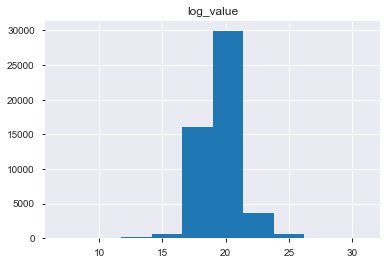

In [17]:
sales_data['log_value'] = np.log2(sales_data['sale_price'])
sales_data.hist(column = 'log_value') 

In [18]:
sales_data.head()

,borough,building_class_category,tax_class_at_present,building_class_at_present,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,price_category,log_value
0,2,0,0,4,5200,1900,1,4,6100000,0,22.540378
3,2,2,0,14,3600,1899,1,14,6300000,0,22.586920
4,2,6,5,21,17478,1920,2,21,14000000,0,23.738923
5,2,6,6,16,6294,1900,2,16,872500,0,19.734796
6,2,6,7,21,14347,1920,2,21,1550000,0,20.563837


## 7. Data Mining

In [19]:
from sklearn.model_selection import train_test_split

X = sales_data.iloc[:,:-3]
y = sales_data.iloc[:,-3]

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

### Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

regrf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
pred_train = regrf.fit(data_train, target_train).predict(data_train)
pred_test = regrf.fit(data_test, target_test).predict(data_test)

print(regrf)
print("Random Forest Mean Absolute Error (Train) : ", mean_absolute_error(target_train, pred_train))
print("Random Forest Mean Absolute Error (Test) : ", mean_absolute_error(target_test, pred_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Random Forest Mean Absolute Error (Train) :  1589116.573734247
Random Forest Mean Absolute Error (Test) :  1439386.6321542363


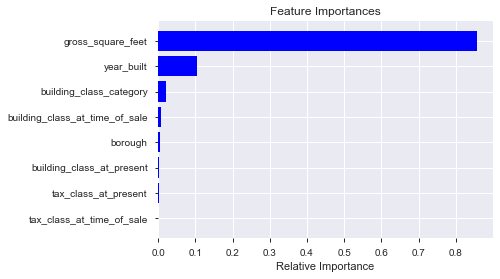

In [21]:
features = list(data_train)
importances = regrf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Linear Regression

In [22]:
from sklearn import linear_model

reglm = linear_model.LinearRegression()
pred_train = reglm.fit(data_train, target_train).predict(data_train)
pred_test = reglm.fit(data_test, target_test).predict(data_test)

print(reglm)
print("Linear Regression Mean Absolute Error (Train) : ", mean_absolute_error(target_train, pred_train))
print("Linear Regression Mean Absolute Error (Test) : ", mean_absolute_error(target_test, pred_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Linear Regression Mean Absolute Error (Train) :  1477832.943168651
Linear Regression Mean Absolute Error (Test) :  1432630.574521445


### Neural Network

In [23]:
from sklearn import neural_network

regnn = neural_network.MLPRegressor()
pred_train = regnn.fit(data_train, target_train).predict(data_train)
pred_test = regnn.fit(data_test, target_test).predict(data_test)

print(regnn)
print("Neural Network Mean Absolute Error (Train) : ", mean_absolute_error(target_train, pred_train))
print("Neural Network Mean Absolute Error (Test) : ", mean_absolute_error(target_test, pred_test))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Neural Network Mean Absolute Error (Train) :  1437381.8614983426
Neural Network Mean Absolute Error (Test) :  1478932.4009477163


## 8. Interpretation

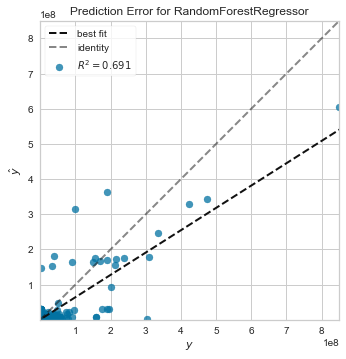

In [24]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regrf)

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

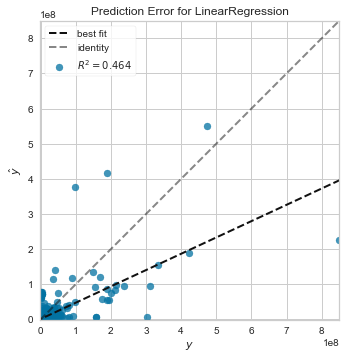

In [25]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(reglm)

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

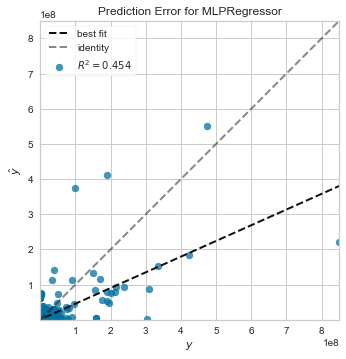

In [26]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regnn)

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

## ***Iteration 2 starts here***

In [27]:
sales_data.head()

,borough,building_class_category,tax_class_at_present,building_class_at_present,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,price_category,log_value
0,2,0,0,4,5200,1900,1,4,6100000,0,22.540378
3,2,2,0,14,3600,1899,1,14,6300000,0,22.586920
4,2,6,5,21,17478,1920,2,21,14000000,0,23.738923
5,2,6,6,16,6294,1900,2,16,872500,0,19.734796
6,2,6,7,21,14347,1920,2,21,1550000,0,20.563837


### Removing Outliers and Extremes

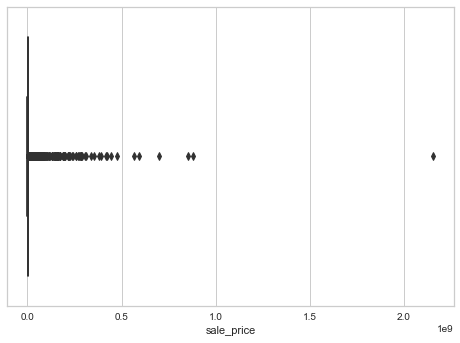

In [28]:
import seaborn as sns
sns.boxplot(sales_data['sale_price'])

In [29]:
sales_data = sales_data.iloc[:,:-1]
sales_data.dtypes

borough                            int32
building_class_category            int32
tax_class_at_present               int32
building_class_at_present          int32
gross_square_feet                 object
year_built                         int64
tax_class_at_time_of_sale          int64
building_class_at_time_of_sale     int32
sale_price                         int64
price_category                     int32
dtype: object

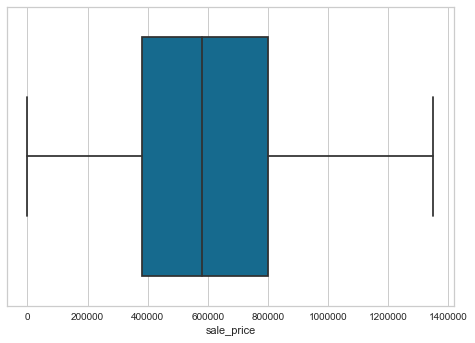

In [30]:
q = sales_data["sale_price"].quantile(0.8)
sales_data_new = sales_data[sales_data["sale_price"] < q]
sns.boxplot(sales_data_new['sale_price'])

In [31]:
sales_data_new.count()

borough                           40910
building_class_category           40910
tax_class_at_present              40910
building_class_at_present         40910
gross_square_feet                 40910
year_built                        40910
tax_class_at_time_of_sale         40910
building_class_at_time_of_sale    40910
sale_price                        40910
price_category                    40910
dtype: int64

In [32]:
sales_data_new.head()

,borough,building_class_category,tax_class_at_present,building_class_at_present,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,price_category
5,2,6,6,16,6294,1900,2,16,872500,0
10,2,6,5,21,13546,1920,2,21,388389,3
15,2,6,7,21,7437,1920,2,21,19475,1
16,2,6,7,21,7485,1920,2,21,19475,1
27,2,6,5,18,10888,1900,2,18,102083,1


In [33]:
X = sales_data_new.iloc[:,:-2]
y = sales_data_new.iloc[:,-2]

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [34]:
regrf2 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
pred_train = regrf2.fit(data_train, target_train).predict(data_train)
pred_test = regrf2.fit(data_test, target_test).predict(data_test)

print(regrf2)
print("Random Forest Mean Absolute Error (Train) : ", mean_absolute_error(target_train, pred_train))
print("Random Forest Mean Absolute Error (Test) : ", mean_absolute_error(target_test, pred_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Random Forest Mean Absolute Error (Train) :  212528.6650996728
Random Forest Mean Absolute Error (Test) :  212466.51284293085


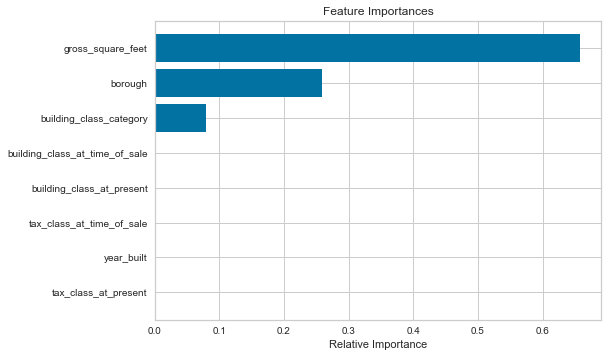

In [35]:
features = list(data_train)
importances = regrf2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

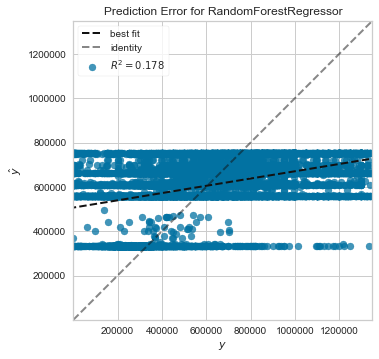

In [36]:
visualizer = PredictionError(regrf2)

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

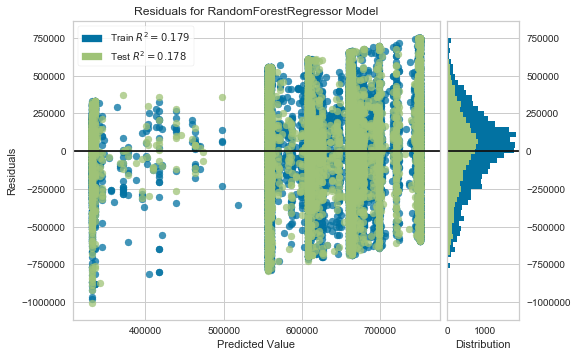

In [37]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regrf2)

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data